Code to simulate ODE system or systemic AI risk

In [18]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Colab Notebooks')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Shock applied to AI at t=30


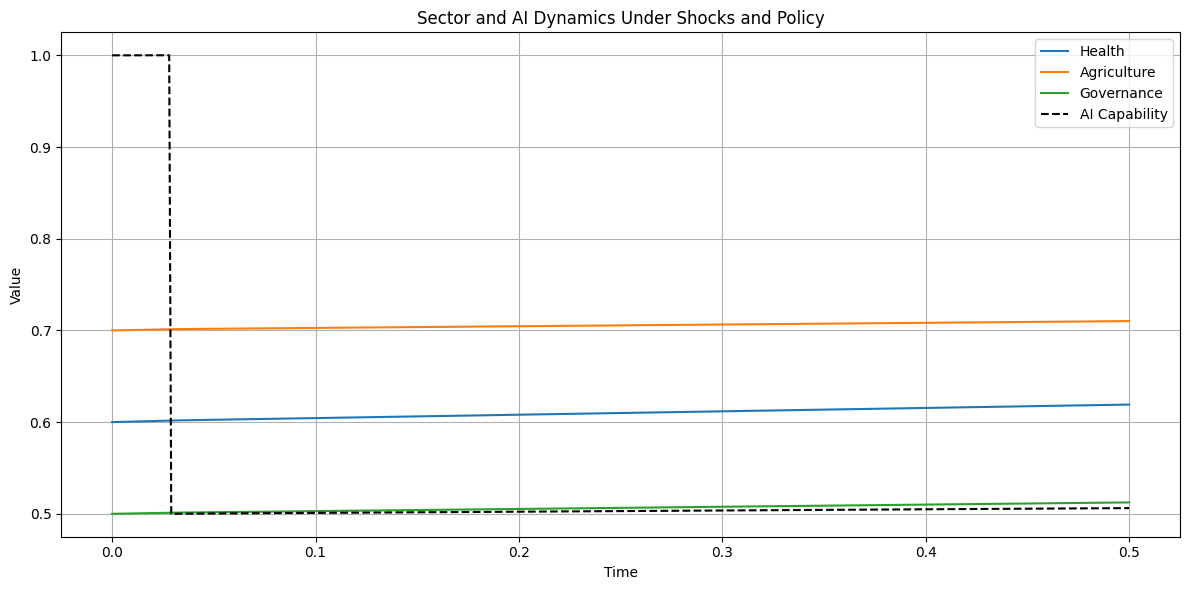

In [19]:

import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 500  # Time steps
dt = 0.001
time = np.linspace(0, T*dt, T)

#print(time)

# Sectors: Health, Agriculture, Governance
sectors = ["Health", "Agriculture", "Governance"]
n = len(sectors)

# Initial values
S = np.zeros((T, n))
S[0] = [0.6, 0.7, 0.5]  # initial health, agriculture, governance scores
A = np.zeros(T)
A[0] = 1.0  # initial AI capability

# Define parameters for each sector
alpha = np.array([0.05, 0.04, 0.03])  # decay
gamma = np.array([0.06, 0.08, 0.05])  # AI contribution
delta = np.array([0.02, 0.03, 0.025])  # AI-induced fragility
theta = np.array([0.01, 0.015, 0.02])  # sector feedback on AI

# Inter-sector influence matrix: beta[x, y] = influence of y on x
beta = np.array([
    [0.0, 0.04, 0.03],  # Health
    [0.02, 0.0, 0.01],  # Agriculture
    [0.01, 0.02, 0.0]   # Governance
])

# AI dynamics parameters
rho = 0.05  # investment rate
kappa = 0.02  # obsolescence rate

# Optional policy flags
policy_AI_boost = False
policy_shield_agriculture = False

# Simulate
for t in range(1, T):
    stress_factor = 1.0

    # Apply a sudden shock to AI at t=30
    if t == 30:
        A[t-1] *= 0.5  # drop AI capability suddenly
        print("Shock applied to AI at t=30")

    # Apply a governance collapse shock at t=60
    #if t == 60:
    #    S[t-1, 2] *= 0.3  # governance collapses
    #    print("Shock applied to Governance at t=60")

    # Policy intervention: AI boost after t=40
    if policy_AI_boost and t > 40:
        rho_eff = rho * 1.5
    else:
        rho_eff = rho

    # Compute sector updates
    for i in range(n):
        inter_sector = sum(beta[i, j] * S[t-1, j] for j in range(n))
        decay = -alpha[i] * S[t-1, i]
        ai_benefit = gamma[i] * A[t-1]
        ai_risk = -delta[i] * S[t-1, i] * A[t-1]

        # Policy: Shield agriculture from AI fragility
        if policy_shield_agriculture and i == 1:
            ai_risk *= 0.5

        dS = (decay + inter_sector + ai_benefit + ai_risk) * dt
        S[t, i] = max(S[t-1, i] + dS, 0)

    # Compute AI update
    feedback_cost = np.dot(theta, S[t-1])
    dA = (rho_eff - kappa * A[t-1] - feedback_cost) * dt
    A[t] = max(A[t-1] + dA, 0)

# Plotting
plt.figure(figsize=(12, 6))
for i in range(n):
    plt.plot(time, S[:, i], label=sectors[i])
plt.plot(time, A, label="AI Capability", linestyle='--', color='black')
plt.title("Sector and AI Dynamics Under Shocks and Policy")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('superintelligence_ode_shock_v2.png', dpi=300)
plt.close()


no shock

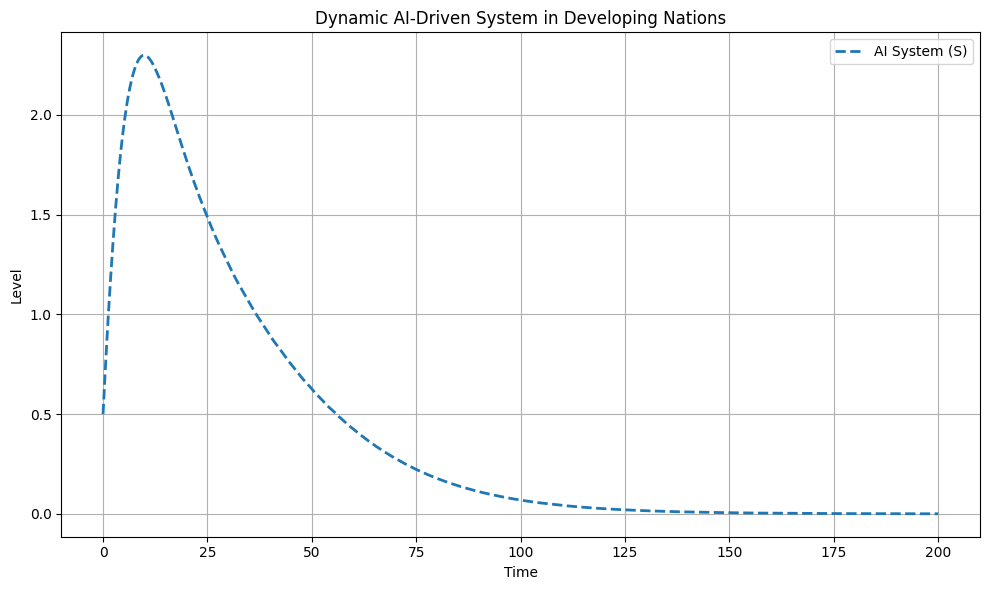

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
alpha = {'H': 0.1, 'A': 0.1, 'G': 0.1, 'I': 0.1}
beta = {
    ('H','A'): 0.05, ('H','G'): 0.05, ('H','I'): 0.05,
    ('A','H'): 0.05, ('A','G'): 0.05, ('A','I'): 0.05,
    ('G','H'): 0.05, ('G','A'): 0.05, ('G','I'): 0.05,
    ('I','H'): 0.05, ('I','A'): 0.05, ('I','G'): 0.05
}
gamma = {'H': 0.1, 'A': 0.1, 'G': 0.1, 'I': 0.1}
delta = {'H': 0.02, 'A': 0.02, 'G': 0.02, 'I': 0.02}
theta = {'H': 0.01, 'A': 0.01, 'G': 0.01, 'I': 0.01}
rho = 0.5
kappa = 0.1

def system(t, y):
    H, A, G, I, S = y
    dH = -alpha['H']*H + beta[('H','A')]*A + beta[('H','G')]*G + beta[('H','I')]*I + gamma['H']*S - delta['H']*S*H
    dA = -alpha['A']*A + beta[('A','H')]*H + beta[('A','G')]*G + beta[('A','I')]*I + gamma['A']*S - delta['A']*S*A
    dG = -alpha['G']*G + beta[('G','H')]*H + beta[('G','A')]*A + beta[('G','I')]*I + gamma['G']*S - delta['G']*S*G
    dI = -alpha['I']*I + beta[('I','H')]*H + beta[('I','A')]*A + beta[('I','G')]*G + gamma['I']*S - delta['I']*S*I
    dS = rho - kappa*S - (theta['H']*H + theta['A']*A + theta['G']*G + theta['I']*I)*S
    return [dH, dA, dG, dI, dS]

# Initial conditions: H, A, G, I, S
y0 = [1.0, 1.0, 1.0, 1.0, 0.5]
t_span = (0, 200)
t_eval = np.linspace(*t_span, 1000)

sol = solve_ivp(system, t_span, y0, t_eval=t_eval)

# Plotting
plt.figure(figsize=(10,6))
#plt.plot(sol.t, sol.y[0], label='Healthcare (H)')
#plt.plot(sol.t, sol.y[1], label='Agriculture (A)')
#plt.plot(sol.t, sol.y[2], label='Governance (G)')
#plt.plot(sol.t, sol.y[3], label='Infrastructure (I)')
plt.plot(sol.t, sol.y[4], label='AI System (S)', linestyle='--', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Level')
plt.title('Dynamic AI-Driven System in Developing Nations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('ai_driven_system.png', dpi=300)
# close the plot to avoid display in Jupyter Notebook
plt.close()


Shock to AI

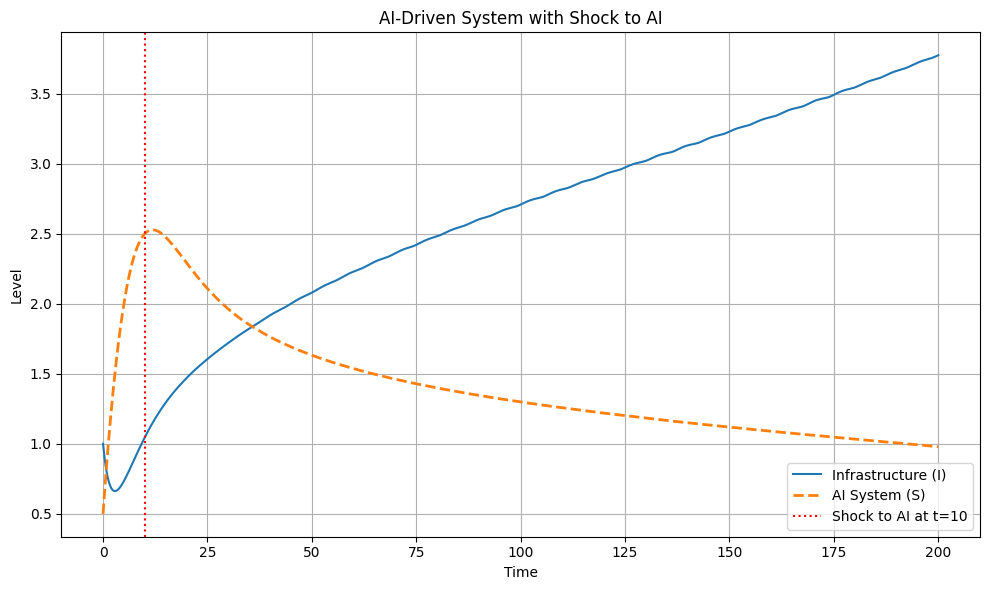

In [24]:
# Parameters

# NOTE: alpha for I changed
alpha = {'H': 0.1, 'A': 0.1, 'G': 0.1, 'I': 0.5}

beta = {
    ('H','A'): 0.05, ('H','G'): 0.05, ('H','I'): 0.05,
    ('A','H'): 0.05, ('A','G'): 0.05, ('A','I'): 0.05,
    ('G','H'): 0.05, ('G','A'): 0.05, ('G','I'): 0.05,
    ('I','H'): 0.05, ('I','A'): 0.05, ('I','G'): 0.05
}
gamma = {'H': 0.1, 'A': 0.1, 'G': 0.1, 'I': 0.1}
delta = {'H': 0.02, 'A': 0.02, 'G': 0.02, 'I': 0.02}
theta = {'H': 0.01, 'A': 0.01, 'G': 0.01, 'I': 0.01}
rho = 0.5
kappa = 0.1


def system_with_shock(t, y):
    H, A, G, I, S = y

    # Introduce shock to S at time t_shock
    t_shock = 10
    shock_magnitude = -0.3  # 30% drop in AI level
    shock_duration = 1.0    # instantaneous (can be extended)

    if abs(t - t_shock) < 0.01:
        S += shock_magnitude  # Directly modifying S — can also modify other parameters

    dH = -alpha['H']*H + beta[('H','A')]*A + beta[('H','G')]*G + beta[('H','I')]*I + gamma['H']*S - delta['H']*S*H
    dA = -alpha['A']*A + beta[('A','H')]*H + beta[('A','G')]*G + beta[('A','I')]*I + gamma['A']*S - delta['A']*S*A
    dG = -alpha['G']*G + beta[('G','H')]*H + beta[('G','A')]*A + beta[('G','I')]*I + gamma['G']*S - delta['G']*S*G
    dI = -alpha['I']*I + beta[('I','H')]*H + beta[('I','A')]*A + beta[('I','G')]*G + gamma['I']*S - delta['I']*S*I
    dS = rho - kappa*S - (theta['H']*H + theta['A']*A + theta['G']*G + theta['I']*I)*S
    return [dH, dA, dG, dI, dS]


sol = solve_ivp(system_with_shock, t_span, y0, t_eval=t_eval)

plt.figure(figsize=(10,6))
plt.plot(sol.t, sol.y[3], label='Infrastructure (I)')
plt.plot(sol.t, sol.y[4], label='AI System (S)', linestyle='--', linewidth=2)
plt.axvline(x=10, color='red', linestyle=':', label='Shock to AI at t=10')
plt.xlabel('Time')
plt.ylabel('Level')
plt.title('AI-Driven System with Shock to AI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('plot_shock_infrastructre_ODE.png', dpi=300)
plt.close()


Updated system with policy intervention

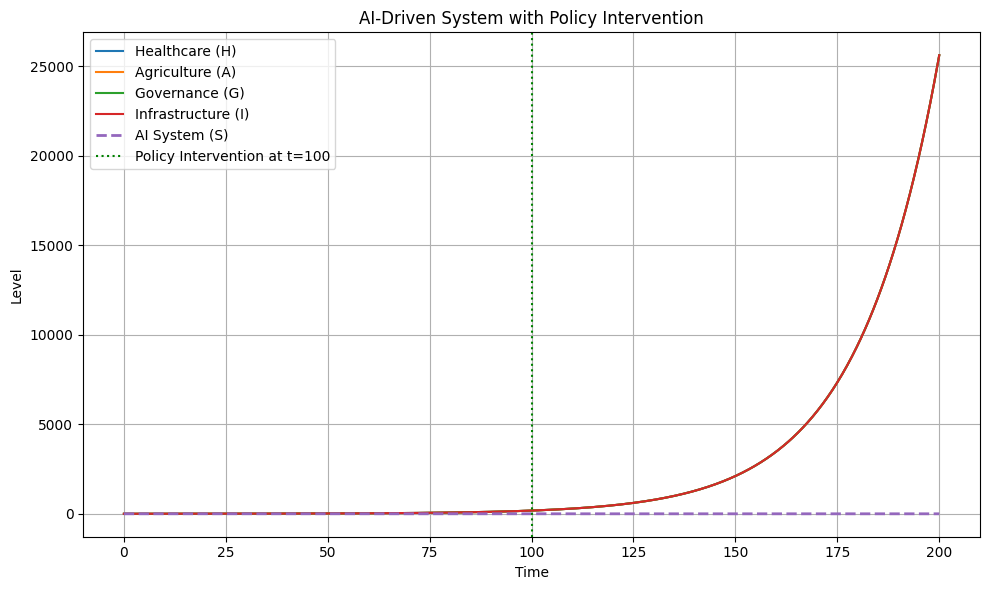

In [4]:
def system_with_policy(t, y):
    H, A, G, I, S = y

    # Policy intervention starts at t_policy
    t_policy = 100

    # Baseline parameters
    rho_effective = rho
    gamma_effective = gamma.copy()

    # Apply policy intervention
    if t >= t_policy:
        rho_effective += 0.2  # increase AI investment
        for key in gamma_effective:
            gamma_effective[key] *= 1.5  # 50% more AI benefit to all sectors

    dH = -alpha['H']*H + beta[('H','A')]*A + beta[('H','G')]*G + beta[('H','I')]*I + gamma_effective['H']*S - delta['H']*S*H
    dA = -alpha['A']*A + beta[('A','H')]*H + beta[('A','G')]*G + beta[('A','I')]*I + gamma_effective['A']*S - delta['A']*S*A
    dG = -alpha['G']*G + beta[('G','H')]*H + beta[('G','A')]*A + beta[('G','I')]*I + gamma_effective['G']*S - delta['G']*S*G
    dI = -alpha['I']*I + beta[('I','H')]*H + beta[('I','A')]*A + beta[('I','G')]*G + gamma_effective['I']*S - delta['I']*S*I
    dS = rho_effective - kappa*S - (theta['H']*H + theta['A']*A + theta['G']*G + theta['I']*I)*S

    return [dH, dA, dG, dI, dS]

sol = solve_ivp(system_with_policy, t_span, y0, t_eval=t_eval)

plt.figure(figsize=(10,6))
plt.plot(sol.t, sol.y[0], label='Healthcare (H)')
plt.plot(sol.t, sol.y[1], label='Agriculture (A)')
plt.plot(sol.t, sol.y[2], label='Governance (G)')
plt.plot(sol.t, sol.y[3], label='Infrastructure (I)')
plt.plot(sol.t, sol.y[4], label='AI System (S)', linestyle='--', linewidth=2)
plt.axvline(x=100, color='green', linestyle=':', label='Policy Intervention at t=100')
plt.xlabel('Time')
plt.ylabel('Level')
plt.title('AI-Driven System with Policy Intervention')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Shock and policy in same code

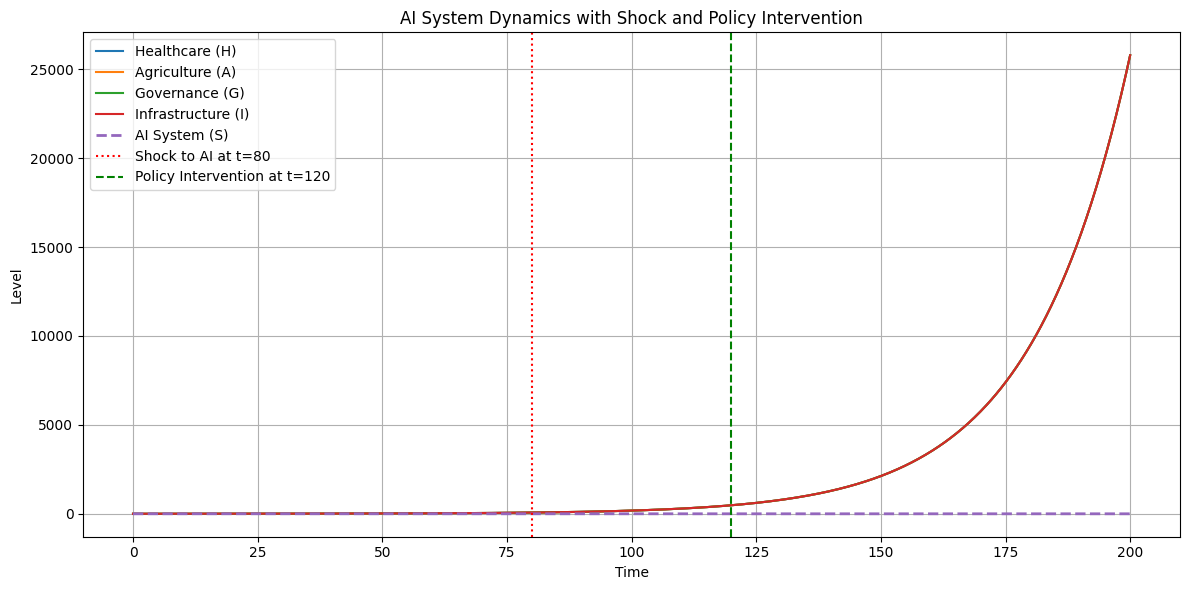

In [5]:
def system_with_shock_and_policy(t, y):
    H, A, G, I, S = y

    # Parameters
    rho_effective = rho
    gamma_effective = gamma.copy()

    # Policy intervention starts at t_policy
    t_policy = 120
    if t >= t_policy:
        rho_effective += 0.2  # Boost AI development
        for key in gamma_effective:
            gamma_effective[key] *= 1.5  # Boost AI-sector integration

    # Shock at t_shock
    t_shock = 80
    shock_magnitude = -0.3
    if abs(t - t_shock) < 0.01:  # Instantaneous shock
        S += shock_magnitude

    # Equations
    dH = -alpha['H']*H + beta[('H','A')]*A + beta[('H','G')]*G + beta[('H','I')]*I + gamma_effective['H']*S - delta['H']*S*H
    dA = -alpha['A']*A + beta[('A','H')]*H + beta[('A','G')]*G + beta[('A','I')]*I + gamma_effective['A']*S - delta['A']*S*A
    dG = -alpha['G']*G + beta[('G','H')]*H + beta[('G','A')]*A + beta[('G','I')]*I + gamma_effective['G']*S - delta['G']*S*G
    dI = -alpha['I']*I + beta[('I','H')]*H + beta[('I','A')]*A + beta[('I','G')]*G + gamma_effective['I']*S - delta['I']*S*I
    dS = rho_effective - kappa*S - (theta['H']*H + theta['A']*A + theta['G']*G + theta['I']*I)*S

    return [dH, dA, dG, dI, dS]

sol = solve_ivp(system_with_shock_and_policy, t_span, y0, t_eval=t_eval)

plt.figure(figsize=(12,6))
plt.plot(sol.t, sol.y[0], label='Healthcare (H)')
plt.plot(sol.t, sol.y[1], label='Agriculture (A)')
plt.plot(sol.t, sol.y[2], label='Governance (G)')
plt.plot(sol.t, sol.y[3], label='Infrastructure (I)')
plt.plot(sol.t, sol.y[4], label='AI System (S)', linestyle='--', linewidth=2)

# Mark events
plt.axvline(x=80, color='red', linestyle=':', label='Shock to AI at t=80')
plt.axvline(x=120, color='green', linestyle='--', label='Policy Intervention at t=120')

plt.xlabel('Time')
plt.ylabel('Level')
plt.title('AI System Dynamics with Shock and Policy Intervention')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Singularity.

Under these parameters AI (I) grows explosively (exponential curve), while other sectors collapse (their values rapidly fall toward zero). This matches the “technological singularity” concept: a point where AI growth becomes uncontrollable. In our simulation, I dominates (skyrockets), causing negative feedback (modelled by negative couplings) that drives H,A,G,S down. This illustrates cascading impacts of unchecked AI. The scenario echoes speculative narratives: e.g. by 2050 AI becomes “unstoppable” with hybrid AI-human control.

Base model

In [ ]:
# Base model parameters
params = {
    'gamma': {'H':0.02,'A':0.015,'G':0.01,'I':0.02,'S':0.02},
    'alpha': {'H':0.01,'A':0.005,'G':0.01,'I':0.01,'S':0.005},
    'beta': {
        'H':{'A':0.01,'I':0.01},
        'A':{'H':0.01,'I':0.01},
        'G':{'H':0.005,'I':0.005},
        'I':{'H':0.01,'A':0.01},
        'S':{'H':0.005,'A':0.005}
    }
}
def model(y, t, p):
    H,A,G,I,S = y
    γ,α,β = p['gamma'], p['alpha'], p['beta']
    dH = γ['H']*H + β['H']['A']*A + β['H']['I']*I - α['H']*H
    dA = γ['A']*A + β['A']['H']*H + β['A']['I']*I - α['A']*A
    dG = γ['G']*G + β['G']['H']*H + β['G']['I']*I - α['G']*G
    dI = γ['I']*I + β['I']['H']*H + β['I']['A']*A - α['I']*I
    dS = γ['S']*S + β['S']['H']*H + β['S']['A']*A - α['S']*S
    return [dH,dA,dG,dI,dS]


In [ ]:
params_sing = params.copy()
params_sing['gamma']['I'] = 0.10        # superintelligence growth rate
params_sing['beta'] = {**params['beta']}
params_sing['beta']['H']['I'] = -0.02   # AI undermines human sector
params_sing['beta']['A']['I'] = -0.02   # AI undermines economy
params_sing['beta']['G']['I'] = -0.01   # AI disrupts governance
# Integrate with odeint: y_sing = odeint(model, y0, t, args=(params_sing,))


In [ ]:
#y_sing = odeint(model, y0, t, args=(params_sing,))

# Initial conditions: H, A, G, I, S
y0 = [1.0, 1.0, 1.0, 1.0, 0.5]
t_span = (0, 200)
t_eval = np.linspace(*t_span, 1000)

sol = solve_ivp(model, t_span, y0, t_eval=t_eval)


TypeError: model() missing 1 required positional argument: 'p'

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
# Assuming you have your model function and params_sing defined

# Initial conditions (H, A, G, I, S)
y0 = [1.0, 1.0, 1.0, 1.0, 0.5]

# Time span
t_span = (0, 200)
t_eval = np.linspace(*t_span, 1000)  # Points to evaluate

# Solve using solve_ivp
sol = solve_ivp(model, t_span, y0, t_eval=t_eval, args=(params_sing,))

# Access the solution components
H = sol.y[0]
A = sol.y[1]
G = sol.y[2]
I = sol.y[3]
S = sol.y[4]
t = sol.t

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, H, label='Healthcare (H)')
plt.plot(t, A, label='Agriculture (A)')
plt.plot(t, G, label='Governance (G)')
plt.plot(t, I, label='Superintelligence (I)')
plt.plot(t, S, label='AI System (S)')
plt.xlabel('Time')
plt.ylabel('Level')
plt.title('Numerical Integration of Singularity Scenario')
plt.legend()
plt.grid(True)
plt.show()

TypeError: cannot unpack non-iterable float object